In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from scripts import functions

df = functions.load('../../data/processed/data.csv')

**Task 5 Research Analysis**

Research Question: What are the amount of turns in each game for White Winners, Black
Winners. We also wanted to find out the amount of turns overall for each games. In the future
we are looking to find an average number of turns for a winning game. This can be shown in the
Scatterplot shown below.

- It seems that the threshold of turns durastically increases in games that end as a draw, as oppopsed to a white winner or a a black winner.
- It also seems that the difference between white and black winning is quite small. I would like to research the exact difference in the future.

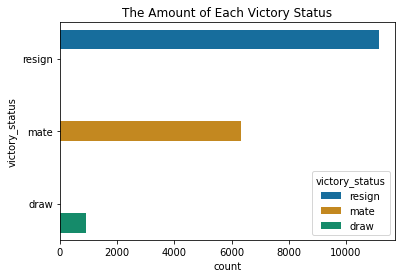

In [2]:
ax = sns.countplot(y='victory_status', data=df,palette='colorblind', hue = 'victory_status')
plt.title('The Amount of Each Victory Status')
plt.savefig('victory_status.png')

In our analyses, we looked into the amount of turns each game, and formulated a histogram
from the results which can be shown below. 
1. The majority of the games consisted of around 40 - 8 terms, with a steep drop off after that. 
2. Most games were less than 75 turns, afterwards the amount of games steeply falls.
3. In the future, I would like to investigate how many games ended in a draw after around 150 turns.

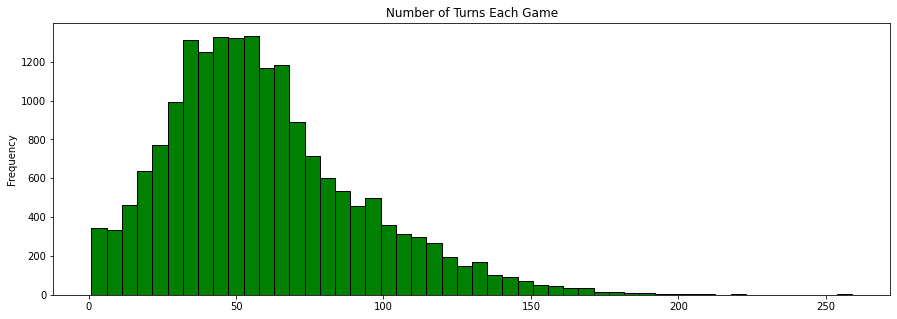

In [3]:
df['turns'].plot(kind='hist', bins=50, figsize=(15,5), facecolor='green',edgecolor='black')
plt.title('Number of Turns Each Game')
plt.savefig('number_turns.png')

**Research Question:** 

What is the most common victory status? and Why?*
In our analysis, first we wanted to understand what is the most common victory status.
Eventually, we would like to determine why that certain status&#39; happen more than others, and
what could lead to a specific one. Shown in the chat below is a countplot of the 3 victory status&;
from our dataset:

1. Mate
2. Resign
3. Draw


Shown the above countplot, resign seems to be the most common victory status. It happens in
almost double the amount of games that mate does. We are not sure why this is. Later in our
analyses, we are going to see all the different types of openings to a match. This could be a
possible effect of a victory status.

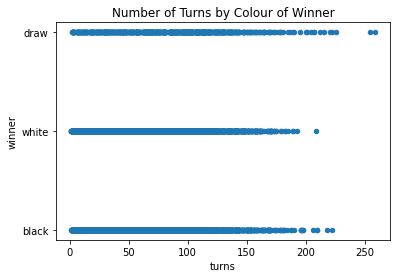

In [4]:
df.plot(kind='scatter', x='turns', y='winner')
plt.title('Number of Turns by Colour of Winner')
plt.savefig('Turns_Colour.png')

"\nwe're fully aware that this isn't readable, the drop_uncommon_openings function was put together last minute and doesn't fully\nfunction as it's supposed to\nSolution: \n    instead of replacing the values in the dataframe and returning it, create a 2D dict\n    and create counts for white/black/draw, then create a barplot for each opening + bars for each condition\n    \n    dict = {opening:\n                {white: count,\n                 black: count,\n                 draw: count\n                }\n           }\n"

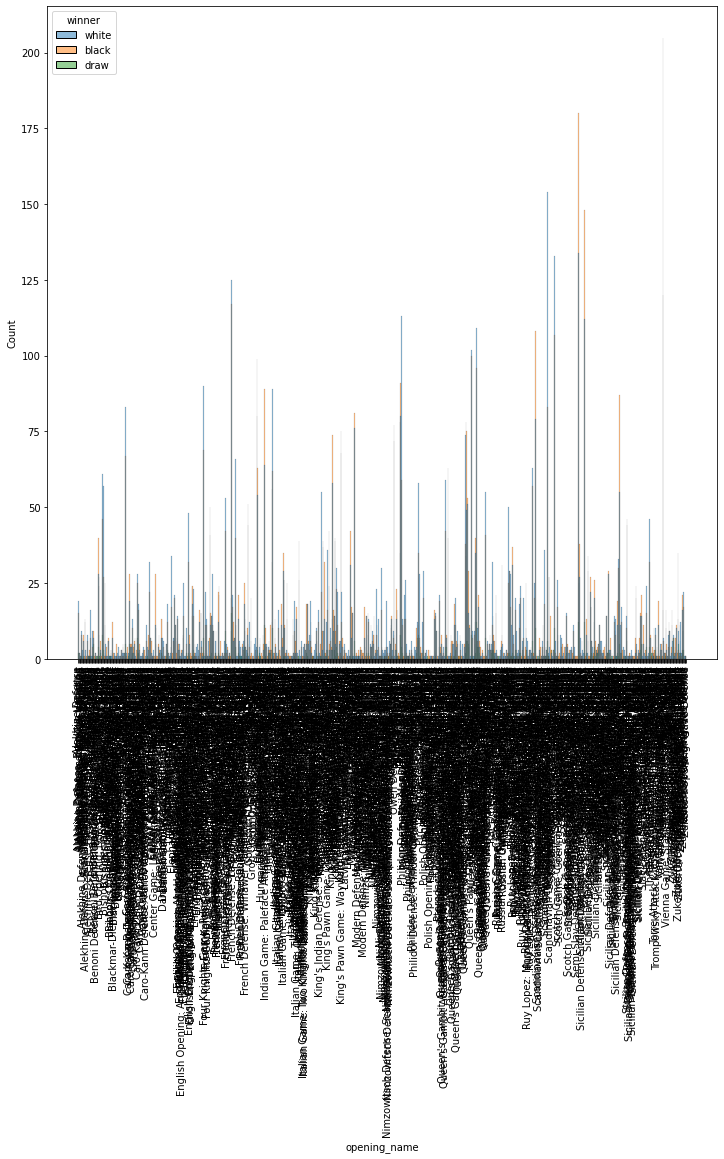

In [5]:
#The openings were investigated with their respective outcomes.
#Which openings are most likely to result in a black win, white win, and draw?

filtered_df = functions.drop_uncommon_openings(df=df, threshold=50).sort_values("opening_name").reset_index(drop=True)

fig, ax = plt.subplots() 
fig.set_size_inches(12, 12)

sns.histplot(data=filtered_df, x='opening_name', hue='winner', stat='count')

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.savefig('openings.png')
"""
we're fully aware that this isn't readable, the drop_uncommon_openings function was put together last minute and doesn't fully
function as it's supposed to
Solution: 
    instead of replacing the values in the dataframe and returning it, create a 2D dict
    and create counts for white/black/draw, then create a barplot for each opening + bars for each condition
    
    dict = {opening:
                {white: count,
                 black: count,
                 draw: count
                }
           }
"""